In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load csv file into memory
data = pd.read_csv('uber-raw-data-apr14.txt')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
# convert Date/Time from string to datetime
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [7]:
# def get_day_of_month(dt):
#     return dt.day

# def get_weekday(dt):
#     return dt.weekday()

# def get_hour(dt):
#     return dt.hour

# data['day_of_month'] = data['Date/Time'].map(get_day_of_month)
# data['weekday'] = data['Date/Time'].map(get_weekday)
# data['hour'] = data['Date/Time'].map(get_hour)

In [8]:
data['day_of_month'] = data['Date/Time'].map(lambda x: x.day)
data['weekday'] = data['Date/Time'].map(lambda x: x.weekday())
data['hour'] = data['Date/Time'].map(lambda x: x.hour)

In [9]:
data.head()

,Date/Time,Lat,Lon,Base,day_of_month,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [10]:
data.tail()

,Date/Time,Lat,Lon,Base,day_of_month,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


### Analysis

#### Day of Month

Text(0.5, 1.0, 'Frequency by Day of the Month - Uber, April 2014')

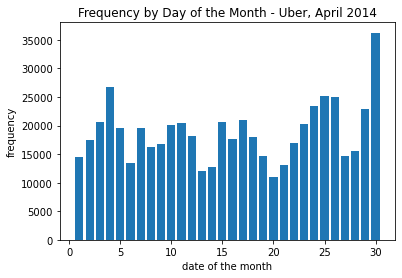

In [11]:
# histogram
hist(data.day_of_month, bins=30, rwidth=.8, range=(0.5, 30.5)) # because there are 30 days in April
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Day of the Month - Uber, April 2014')

In [12]:
for k, rows in data.groupby('day_of_month'):
    print(k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [13]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('day_of_month').apply(count_rows)
by_date

day_of_month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

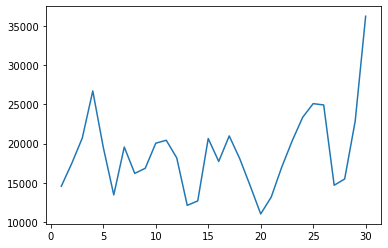

In [14]:
plot(by_date)

<BarContainer object of 30 artists>

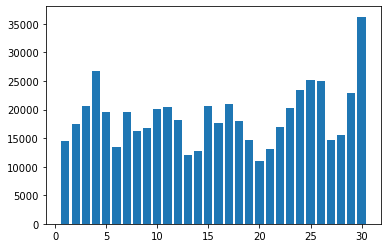

In [15]:
bar(range(1, 31), by_date)

In [16]:
by_date_sorted = by_date.sort_values()
by_date_sorted

day_of_month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

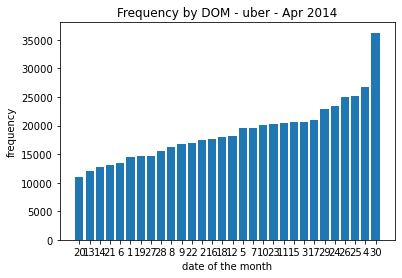

In [18]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DOM - uber - Apr 2014')
;

## Analyze the Hour

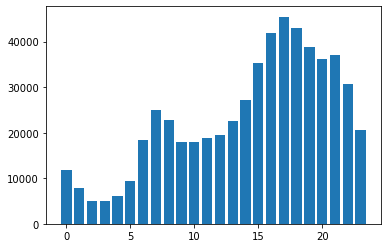

In [24]:
hist(data.hour, bins=24, range=(-.5, 23.5), rwidth=.8);

## Analyze the Weekday

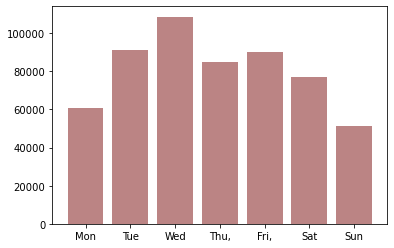

In [27]:
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=.8, color='#AA6666', alpha=.8)
xticks(range(7), 'Mon Tue Wed Thu, Fri, Sat Sun'.split());

## Cross-Analysis (hour, day of week)

In [29]:
count_rows(data)

564516

In [31]:
by_h_d = data.groupby(['hour', 'weekday']).apply(count_rows)

In [32]:
by_h_d.unstack() # like using a pivot table

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


In [33]:
by_d_h = data.groupby(['weekday', 'hour']).apply(count_rows).unstack()
by_d_h

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

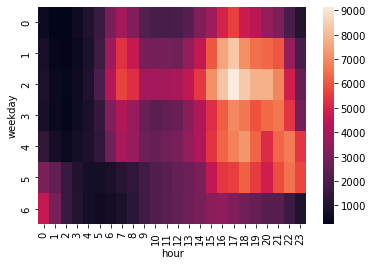

In [34]:
sns.heatmap(by_d_h)

## Analysis by Lat and Lon

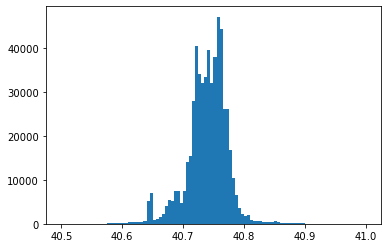

In [36]:
hist(data.Lat, bins=100, range=(40.5, 41));

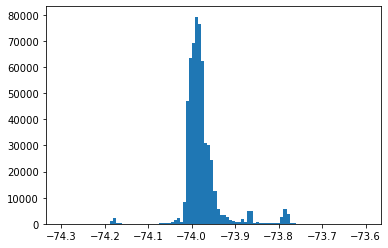

In [39]:
hist(data.Lon, bins=100, range=(-74.3, -73.6));

''

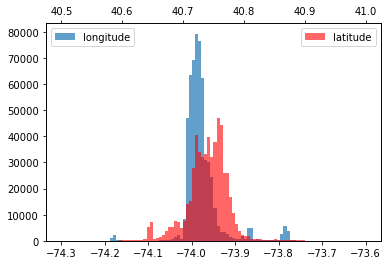

In [46]:
hist(data.Lon, bins=100, range=(-74.3, -73.6), alpha=0.7, label='longitude')
legend(loc='upper left')
twiny()
hist(data.Lat, bins=100, range=(40.5, 41), color='r', alpha=.6, label='latitude')
legend(loc='upper right')
;

(0.0, 100.0)

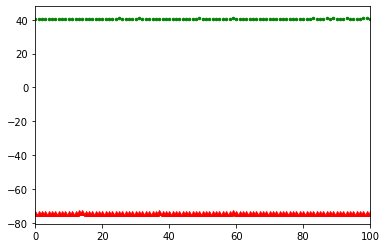

In [53]:
plot(data.Lat, '.', ms=5, color='green', label='lat')
plot(data.Lon, '^', ms=5, color='red', label='lon')
xlim(0,100)

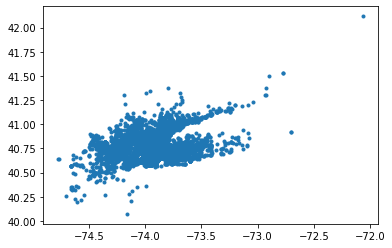

In [55]:
plot(data.Lon, data.Lat, '.')

(40.5, 41.0)

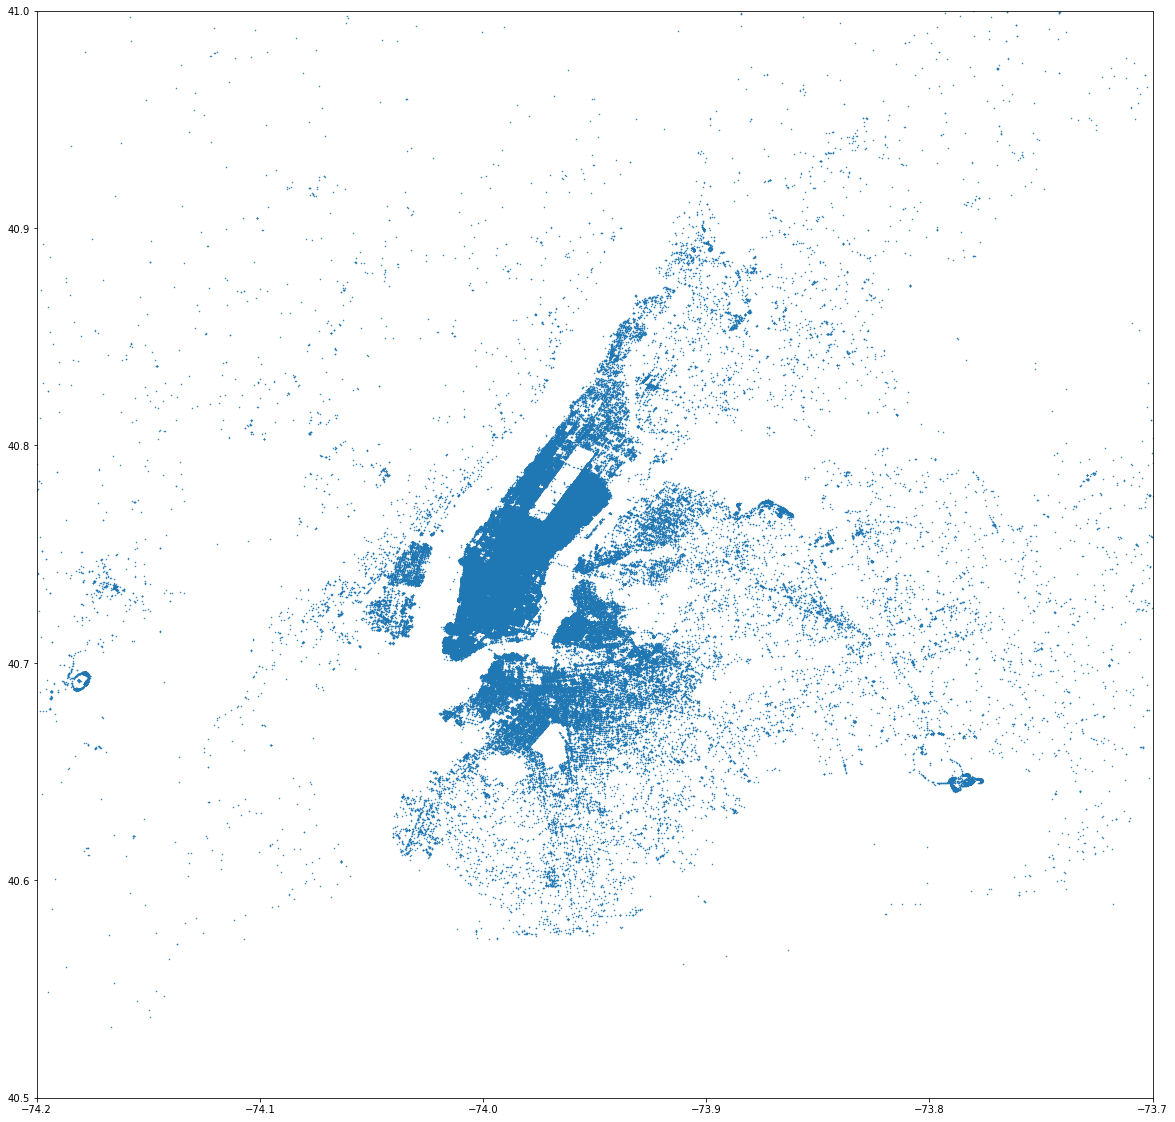

In [58]:
figure(figsize=(20,20))
plot(data.Lon, data.Lat, '.', ms=1)
xlim(-74.2, -73.7)
ylim(40.5, 41);

WOW!! THAT'S THE MAP OF MANHATTAN!! We see Central Park as the white rectangle.